# Step 1: Import Libraries

In [1]:
#importing libraies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 2: Load the Data

In [2]:
#saving file path:
file_path = "/Users/dhineshkumar/Downloads/data.csv"

#since we cant encode the data using utf-8 it shows UnicodeDecodeError using 'ISO-8859-1':
data = pd.read_csv(file_path, encoding='ISO-8859-1')

# Step 3: Explore the Data

In [3]:
# Displaying first 3 rows:
data.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom


In [4]:
# displaying last 3 rows
data.tail(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [5]:
# No of rows and columns:
data.shape

(541909, 8)

In [6]:
#To check missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


# Step 4: Data Cleaning

In [7]:
#Identifying missing values

print(data.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [8]:
#Before imputation check the number of unique columns:
data['Description'].nunique()

4223

In [9]:
#Before imputation check the number of unique columns:
data['StockCode'].nunique()

4070

In [10]:
# Taking mode of grouping stockcode and description and filling in the missing values if there is no mode use first value
data['Description'].fillna(data.groupby('StockCode')['Description'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else x.iloc[0]), inplace=True)

In [11]:
data['Description'].isnull().sum()

112

In [12]:
missing_description_groups = data[data['Description'].isnull()]['StockCode'].unique()
print(missing_description_groups)

['21134' '85226A' '85044' '20950' '84670' '35951' '21653' '20849' '72803B'
 '85018C' '62095B' '72814' '84247C' '90042B' '21431' '21589' '84546'
 '17011A' '84455' '84967A' '84967B' '84966B' '84966A' 'DCGS0055'
 'DCGS0072' 'DCGS0074' '20864' '21282' '21805' '22143' '35644' '35991'
 '84424A' '84509F' '84526' '84664' '84964B' '85110' '85179B' '90000C'
 '90095' '90091' 'DCGS0057' '35969' '20738' '20689' '47563B' '37477D'
 '84559D' '35823P' '20850' '21283' '22036' '79172D' '72800F' '72781'
 '35015' '72793' '72789' '85018B' '35824B' '84726' '84875A' '84876C'
 '84845D' '21274' '21474' '10134' '21511' '82545A' '84251F' '35603B'
 '47502' '84007' '21337' '46037A' '84251J' '40018F' '84864A' '21825'
 '10123G' '84899F' '20863' '21923' '20896' '20825' '85060' '35594' '21330'
 '78027' '21806' '85226C' '47591A' '37424' '90037D' '84857A' '84482'
 '21854' '16053' '84797B' 'DCGS0071' 'DCGS0066P' '21858' '21432' '77081'
 '21765' '84761' '21610' '37477B' '37477C' '35592T' '84971L']


In [13]:
data.dropna(subset=['Description'], inplace=True)

In [14]:
print(data.isnull().sum())

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     134968
Country             0
dtype: int64


In [15]:
data['CustomerID'].nunique()

4372

In [16]:
customer_per_country = data.groupby('Country')['CustomerID'].nunique()
print(customer_per_country)

Country
Australia                  9
Austria                   11
Bahrain                    2
Belgium                   25
Brazil                     1
Canada                     4
Channel Islands            9
Cyprus                     8
Czech Republic             1
Denmark                    9
EIRE                       3
European Community         1
Finland                   12
France                    87
Germany                   95
Greece                     4
Hong Kong                  0
Iceland                    1
Israel                     4
Italy                     15
Japan                      8
Lebanon                    1
Lithuania                  1
Malta                      2
Netherlands                9
Norway                    10
Poland                     6
Portugal                  19
RSA                        1
Saudi Arabia               1
Singapore                  1
Spain                     31
Sweden                     8
Switzerland               21
USA   

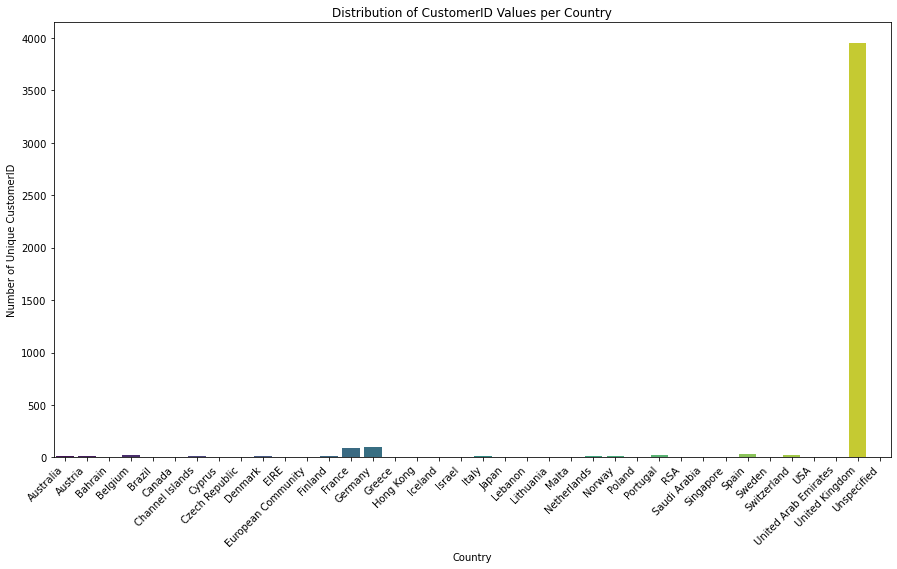

Countries with Missing CustomerID values: ['United Kingdom' 'EIRE' 'Bahrain' 'Israel' 'Hong Kong' 'Unspecified'
 'France' 'Switzerland' 'Portugal']


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize distribution of 'CustomerID' values per country
plt.figure(figsize=(15, 8))
sns.barplot(x=customer_per_country.index, y=customer_per_country.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of CustomerID Values per Country')
plt.xlabel('Country')
plt.ylabel('Number of Unique CustomerID')
plt.show()

# Check if there are missing 'CustomerID' values in specific countries
missing_customer_id_countries = data[data['CustomerID'].isnull()]['Country'].unique()
print("Countries with Missing CustomerID values:", missing_customer_id_countries)


<AxesSubplot:xlabel='CustomerID', ylabel='Country'>

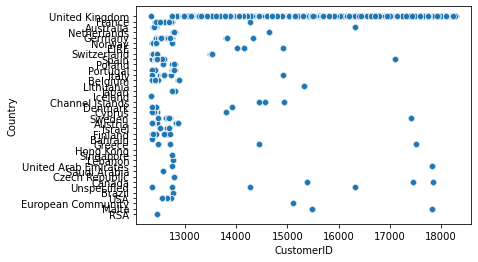

In [18]:
sns.scatterplot(x='CustomerID', y='Country', data=data)

In [19]:
# Group by 'Country' and calculate the mode 'CustomerID'
def mode_of_group(series):
    mode_values = series.mode()
    return mode_values.iloc[0] if not mode_values.empty else None

country_mode_customer_id = data.groupby('Country')['CustomerID'].agg(mode_of_group)

# Function to impute missing 'CustomerID' based on mode for each country
def impute_customer_id(row):
    if pd.isnull(row['CustomerID']):
        return country_mode_customer_id.get(row['Country'], None)
    else:
        return row['CustomerID']

# Apply the imputation function to fill missing 'CustomerID' values
data['CustomerID'] = data.apply(impute_customer_id, axis=1)


In [20]:
print(data.isnull().sum())

InvoiceNo        0
StockCode        0
Description      0
Quantity         0
InvoiceDate      0
UnitPrice        0
CustomerID     288
Country          0
dtype: int64


In [21]:
data.dropna(subset=['CustomerID'], inplace=True)

In [22]:
print(data.isnull().sum())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


# Step 5: Data Exploration

In [23]:
# to find the summary statistics
data.describe()

,Quantity,UnitPrice,CustomerID
count,541509.000000,541509.000000,541509.000000
mean,9.552194,4.591913,15914.274688
std,218.161011,96.532139,1851.205783
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,14359.000000
50%,3.000000,2.080000,16236.000000
75%,10.000000,4.130000,17841.000000
max,80995.000000,38970.000000,18287.000000


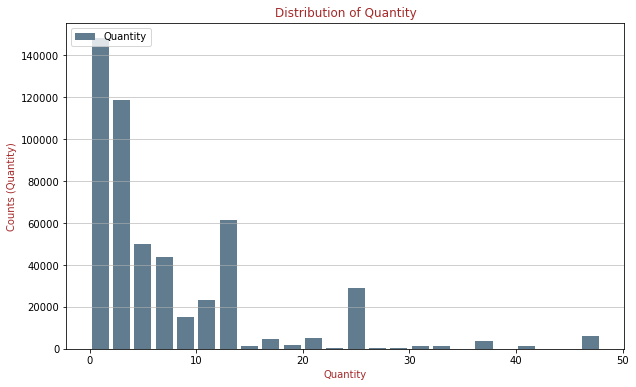

In [24]:
import matplotlib.pyplot as plt

# Checking for the distribution of the 'Quantity' column
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_title('Distribution of Quantity', color='brown')
ax1.set_xlabel('Quantity', color='brown')
ax1.set_ylabel('Counts (Quantity)', color='brown')
ax1.grid(axis='y', alpha=0.75)
ax1.hist(data['Quantity'], bins=range(0, 50, 2), rwidth=0.8, color='#607c8e', label='Quantity')
ax1.legend(loc='upper left')

plt.show()


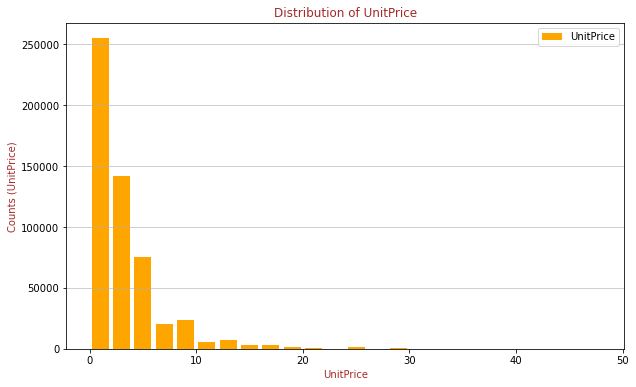

In [25]:
import matplotlib.pyplot as plt

# Checking for the distribution of the 'UnitPrice' column
fig, ax2 = plt.subplots(figsize=(10, 6))

ax2.set_title('Distribution of UnitPrice', color='brown')
ax2.set_xlabel('UnitPrice', color='brown')
ax2.set_ylabel('Counts (UnitPrice)', color='brown')
ax2.grid(axis='y', alpha=0.75)
ax2.hist(data['UnitPrice'], bins=range(0, 50, 2), rwidth=0.8, color='orange', label='UnitPrice')
ax2.legend(loc='upper right')

plt.show()


# Step 6: Feature Engineering

In [26]:
#Adding additional feature to the dataframe for further analysis
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['Month'] = data['InvoiceDate'].dt.month
data['Day'] = data['InvoiceDate'].dt.day
data['Hour'] = data['InvoiceDate'].dt.hour
data['Price'] = data['Quantity'] * data['UnitPrice']

In [27]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Month', 'Day', 'Hour', 'Price'],
      dtype='object')

# Step 7: Analysis and Visualization

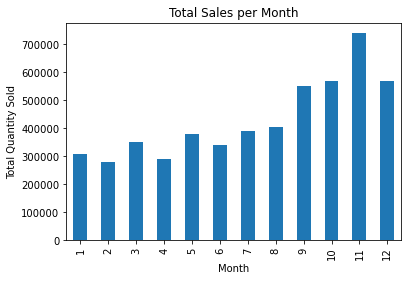

In [28]:
# Total sales per month
monthly_sales = data.groupby('Month')['Quantity'].sum()
monthly_sales.plot(kind='bar')
plt.title('Total Sales per Month')
plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')
plt.show()

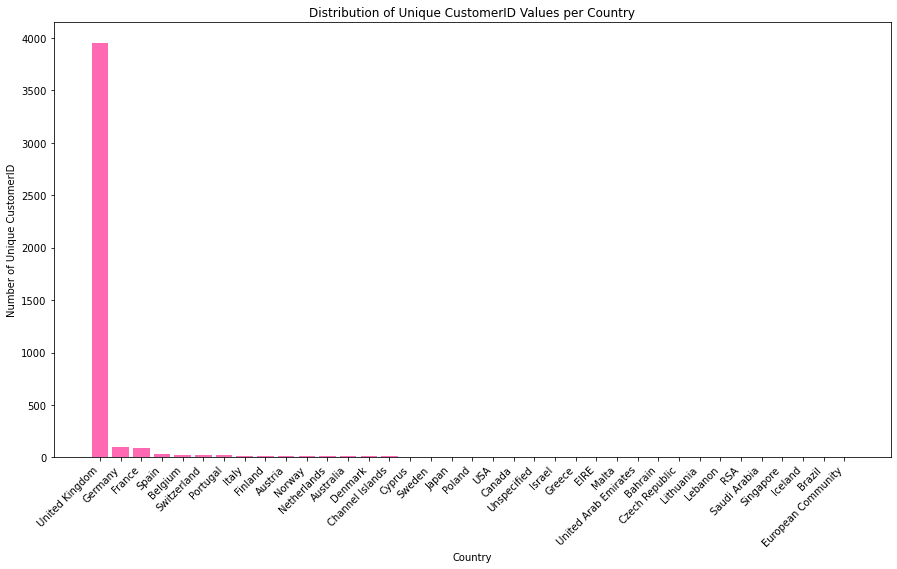

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'data' and has a 'Country' and 'CustomerID' column
unique_customers_per_country = data.groupby('Country')['CustomerID'].nunique().sort_values(ascending=False)

plt.figure(figsize=(15, 8))
plt.bar(unique_customers_per_country.index, unique_customers_per_country.values, color='hotpink')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Unique CustomerID Values per Country')
plt.xlabel('Country')
plt.ylabel('Number of Unique CustomerID')
plt.show()


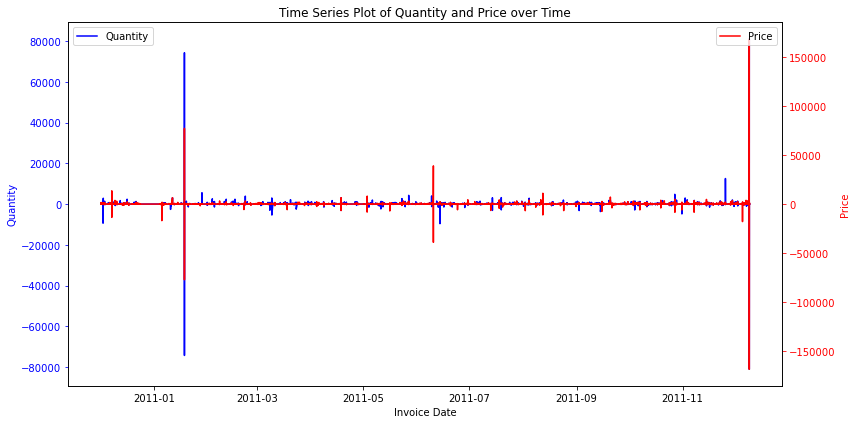

In [35]:
import matplotlib.pyplot as plt

# Create a new figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Quantity on the first y-axis
ax1.plot(data['InvoiceDate'], data['Quantity'], color='b', label='Quantity')
ax1.set_xlabel('Invoice Date')
ax1.set_ylabel('Quantity', color='b')
ax1.tick_params('y', colors='b')

# Create a second y-axis for Price
ax2 = ax1.twinx()
ax2.plot(data['InvoiceDate'], data['Price'], color='r', label='Price')
ax2.set_ylabel('Price', color='r')
ax2.tick_params('y', colors='r')

# Title and legend
plt.title('Time Series Plot of Quantity and Price over Time')
fig.tight_layout()
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()